In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
# Takes a .gct file and optional summary parameter and returns a Pandas DataFrame containing the contents of the input file
def gct_read(gct_file, summary=False):
    # Read the file, skipping the first two lines, and ensure that 'Name' and 'Description' are indexes and not included in data
    df = pd.read_csv(gct_file, skiprows=2, sep = "\t",index_col=[0,1])
    df = df.apply(pd.to_numeric)
    # If summary parameter is true, include number of rows and columns imported!
    if summary==True:
        print(f"Imported DataFrame with {df.shape[0]} rows and {df.shape[1]} columns")
    # Return the DataFrame
    return df

gct_file = "BRCA_minimal_60x19.gct"
df = gct_read(gct_file, summary = True)
print(df.head())

gct_file2= "BRCA_large_20783x40.gct"
df2 = gct_read(gct_file2)
print(df2.head())

Imported DataFrame with 60 rows and 19 columns
                           A7-A0CE-Normal  A7-A0CH-Normal  A7-A0D9-Normal  \
Name   Description                                                          
COL1A1 NCBI Gene ID: 1277      52818.7302      23289.8919      17914.9695   
SCD    NCBI Gene ID: 6319       5162.2222      54122.0498      35382.3829   
CPB1   NCBI Gene ID: 1360       5948.8889        844.0056         84.0122   
COL1A2 NCBI Gene ID: 1278      44192.3810      40442.3131      36163.4420   
ADIPOQ NCBI Gene ID: 9370       1317.1429      23352.3272     121017.3116   

                           A7-A0DB-Normal  A7-A13E-Normal  A7-A13F-Normal  \
Name   Description                                                          
COL1A1 NCBI Gene ID: 1277     146930.9278      63379.9398      19315.6713   
SCD    NCBI Gene ID: 6319      12003.6082     235057.2000     147841.0418   
CPB1   NCBI Gene ID: 1360        116.4948        117.5835         56.5784   
COL1A2 NCBI Gene ID: 1278   

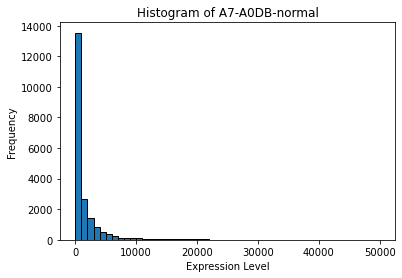

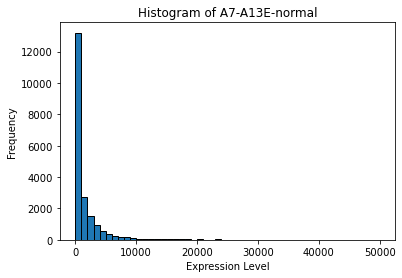

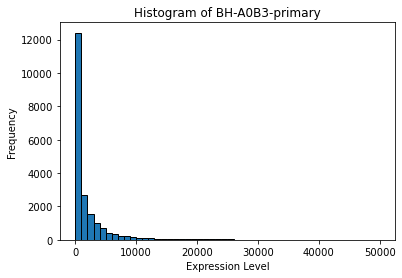

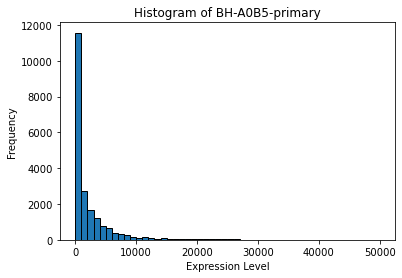

In [15]:
# This function takes a Pandas DataFrame, column, and a maximum value at 50000 and plots the histogram for that column with appropriate labels
def plot_histograms(df, columns, max_value=50000):
    for col in columns:
        if col in df.columns:
            plt.figure()
            plt.hist(df[col], bins=50, range=(0, max_value), edgecolor='black')
            plt.xlabel('Expression Level')
            plt.ylabel('Frequency')
            plt.title(f'Histogram of {col}')
            plt.show()
            
plot_A = plot_histograms(df2, ["A7-A0DB-normal"])
plot_B = plot_histograms(df2, ["A7-A13E-normal"])
plot_C = plot_histograms(df2, ["BH-A0B3-primary"])
plot_D = plot_histograms(df2, ["BH-A0B5-primary"])


In [10]:
def dataframe_stats(df):
    # exclude the name and description columns set as index as in gct_read(), 
    # and convert all other columns to a numeric value
    df_input = df.reset_index(drop=True).apply(pd.to_numeric, errors='coerce')
    stats_df = pd.DataFrame({
        'Sample Name': df_input.columns,
        'Mean': df_input.mean(),
        'Median': df_input.median(),
        'Standard Deviation': df_input.std()
    }).reset_index(drop=True)
    
    return stats_df

stats_df2 = dataframe_stats(df2)
print(stats_df2)

        Sample Name         Mean  Median  Standard Deviation
0    A7-A0CE-normal  3308.877255   814.0        12725.531516
1    A7-A0CH-normal  3046.316942   630.0        14145.451194
2    A7-A0D9-normal  2628.131550   350.0        17827.391513
3    A7-A0DB-normal  2354.674445   362.0        13973.914409
4    A7-A13E-normal  2380.702593   427.0        13373.496798
5    A7-A13F-normal  2493.380215   527.0        12477.592390
6    A7-A13G-normal  3509.542463   454.0        30474.663592
7    AC-A23H-normal  3396.675312   659.0        20073.855034
8    AC-A2FB-normal  3675.583169   792.0        15577.976864
9    AC-A2FF-normal  3743.660492   935.0        14827.012985
10   AC-A2FM-normal  2714.893663   578.0        11431.472640
11   BH-A0AU-normal  2436.466679   641.0         8961.357233
12   BH-A0AY-normal  2412.727951   567.0         9362.391989
13   BH-A0AZ-normal  3216.765337   836.0        10744.505522
14   BH-A0B3-normal  2879.876149   772.0         9737.708560
15   BH-A0B5-normal  312

In [13]:
# This function takes a Pandas DataFrame and a threshold value of 1000 and filters out any rows whose maximum value is less than 1000
def filter_out(df, threshold=1000):
    return df[df.max(axis=1) >= threshold]

# Initialize the filtered DataFrame and its statistics and print out
df2_filtered = filter_out(df2, threshold=1000)
stats_filtered = dataframe_stats(df2_filtered)
print(stats_filtered)

        Sample Name         Mean  Median  Standard Deviation
0    A7-A0CE-normal  5058.274447  2130.0        15556.522485
1    A7-A0CH-normal  4665.274373  1720.0        17387.078299
2    A7-A0D9-normal  4030.654502  1150.0        22054.057242
3    A7-A0DB-normal  3608.259552  1150.0        17257.234494
4    A7-A13E-normal  3647.490728  1252.0        16501.582134
5    A7-A13F-normal  3815.334550  1433.0        15363.868783
6    A7-A13G-normal  5381.639979  1491.0        37783.893082
7    AC-A23H-normal  5200.198928  1811.0        24789.847599
8    AC-A2FB-normal  5629.312281  2169.0        19100.667418
9    AC-A2FF-normal  5725.120801  2442.0        18143.368163
10   AC-A2FM-normal  4149.738735  1580.0        14016.040085
11   BH-A0AU-normal  3713.193491  1678.0        10940.273011
12   BH-A0AY-normal  3689.122440  1528.0        11448.591722
13   BH-A0AZ-normal  4907.938557  2201.0        13061.367675
14   BH-A0B3-normal  4395.092798  2012.0        11843.884493
15   BH-A0B5-normal  480

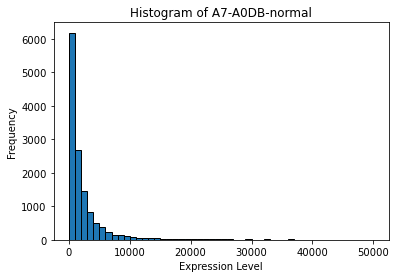

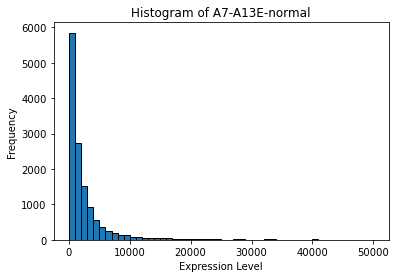

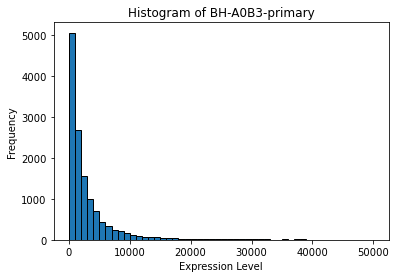

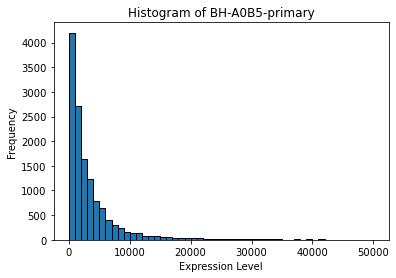

In [12]:
plot_Af = plot_histograms(df2_filtered, ["A7-A0DB-normal"])
plot_Bf = plot_histograms(df2_filtered, ["A7-A13E-normal"])
plot_Cf = plot_histograms(df2_filtered, ["BH-A0B3-primary"])
plot_Df = plot_histograms(df2_filtered, ["BH-A0B5-primary"])